# Linear Regression Example

A dataset containing information about various cars, including their specifications and selling prices. The task is to develop a machine learning model that can predict the selling price of a car based on its specifications.

In [22]:
import numpy as numpy
import pandas as pd

from sklearn import linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

%matplotlib inline

## Checking Data

In [2]:
df = pd.read_csv("./cars.csv")
df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


In [3]:
df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [4]:
df = df.astype({
    "Brand": "category",
    "Model": "category",
    "Fuel_Type": "category",
    "Transmission": "category",
    "Owner_Type": "category"
})

In [5]:
df.dtypes

Car_ID                  int64
Brand                category
Model                category
Year                    int64
Kilometers_Driven       int64
Fuel_Type            category
Transmission         category
Owner_Type           category
Mileage                 int64
Engine                  int64
Power                   int64
Seats                   int64
Price                   int64
dtype: object

In [70]:
# convert category type to numerical type
df['Fuel_Type'] = df['Fuel_Type'].cat.codes
df['Transmission'] = df['Transmission'].cat.codes
df['Owner_Type'] = df['Owner_Type'].replace({'First': 1, 'Second': 2, 'Third': 3}).cat.codes
del df['Car_ID'] # Just must drop...
df = df.drop(['Model', 'Brand'], axis=1) # is too complex for regression model
df.dtypes

AttributeError: Can only use .cat accessor with a 'category' dtype

In [66]:
df.head()

,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,2018,50000,1,1,0,15,1498,108,5,800000
1,2019,40000,1,0,1,17,1597,140,5,1000000
2,2017,20000,1,0,0,10,4951,395,4,2500000
3,2020,30000,0,1,2,23,1248,74,5,600000
4,2016,60000,0,0,1,18,1999,194,5,850000


c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


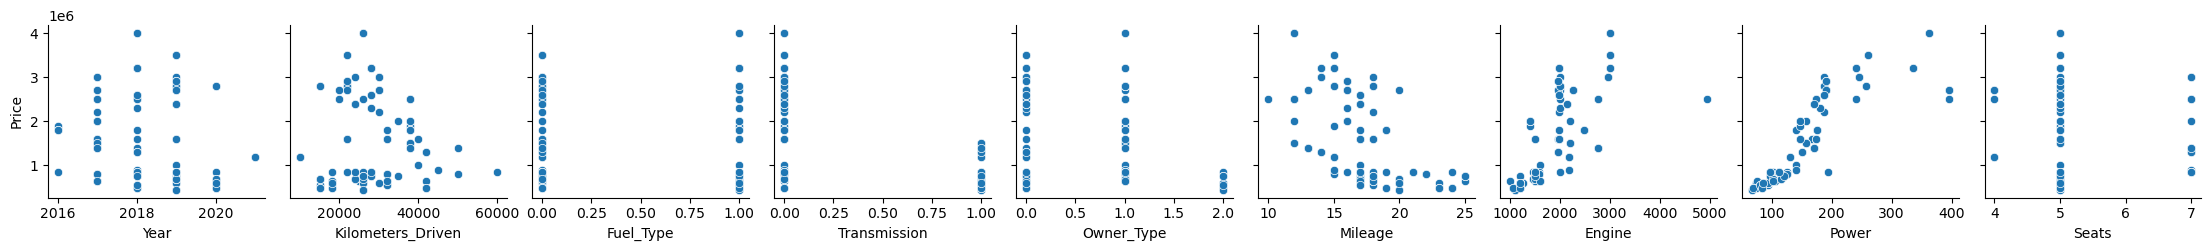

In [68]:
sns.pairplot(
    data=df, 
    x_vars=['Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power','Seats'],
    y_vars='Price'
)

c:\Users\Mr\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


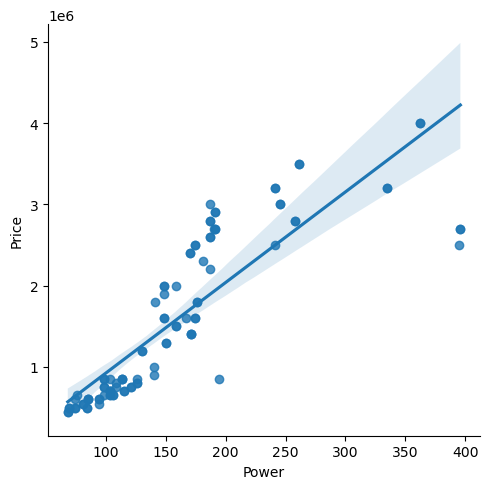

In [69]:
sns.lmplot(
    data=df,
    x= 'Power', y = 'Price'
)

In [71]:
# Very strange
df['Power_2'] = df['Power'] ** 2

## Using regression Model form scikit-learn

In [72]:
x = df.loc[:, df.columns!= 'Price'].to_numpy()
y = df['Price'].to_numpy()
x_trian, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
reg = linear_model.LinearRegression()
reg.fit(x_trian, y_train)

LinearRegression()

In [73]:
y_pre = reg.predict(x_test)
y_pre

array([1883596.49473828,  831902.36842386, 1059820.97993806,
         94789.91133999,  586963.78868564, 2901824.81085679,
        443576.82807748,  804299.41431186, 1787155.09023905,
       2901824.81085679])

In [74]:
y_test

array([2500000,  750000,  700000,  550000,  500000, 4000000,  600000,
        750000, 1600000, 4000000], dtype=int64)

<Axes: >

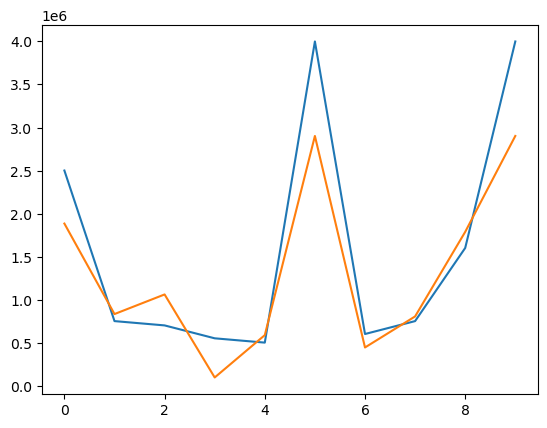

In [75]:
sns.lineplot(
    data = y_test
)

sns.lineplot(
    data = y_pre
)

In [76]:
from sklearn.metrics import r2_score

In [77]:
r2_score(y_test, y_pre)

0.8209036306009512